### Take out games with teams with no club play data

In [1]:
import pandas as pd
from sportsref import euro

years = [2015, 2016, 2017]

In [2]:
# build dicts
# need sep dicts for each year because of relegation/promotion

club_leagues = ['greek-basket-league', 'spain-liga-acb','italy-basket-serie-a','france-lnb-pro-a']

league_dicts = {}

for year in years:
    league_dicts[year] = {}
    for league_id in club_leagues:
        season = euro.Season(year, league_id)
        team_ids = season.get_team_ids()
    
        for team_id in team_ids:
            league_dicts[year][team_id] = league_id

In [3]:
league_dicts[2015]

{'aek-athens': 'greek-basket-league',
 'andorra': 'spain-liga-acb',
 'apollon-patras': 'greek-basket-league',
 'aries-trikala': 'greek-basket-league',
 'aris': 'greek-basket-league',
 'avellino': 'italy-basket-serie-a',
 'barcelona': 'spain-liga-acb',
 'bilbao': 'spain-liga-acb',
 'boulogne': 'france-lnb-pro-a',
 'bourg': 'france-lnb-pro-a',
 'brindisi': 'italy-basket-serie-a',
 'canarias': 'spain-liga-acb',
 'cantu': 'italy-basket-serie-a',
 'caserta': 'italy-basket-serie-a',
 'chalon': 'france-lnb-pro-a',
 'cholet': 'france-lnb-pro-a',
 'cremona': 'italy-basket-serie-a',
 'dijon': 'france-lnb-pro-a',
 'drama': 'greek-basket-league',
 'estudiantes': 'spain-liga-acb',
 'fuenlabrada': 'spain-liga-acb',
 'gran-canaria': 'spain-liga-acb',
 'gravelines': 'france-lnb-pro-a',
 'joventut': 'spain-liga-acb',
 'koroivos': 'greek-basket-league',
 'le-havre': 'france-lnb-pro-a',
 'le-mans': 'france-lnb-pro-a',
 'limoges': 'france-lnb-pro-a',
 'manresa': 'spain-liga-acb',
 'milano': 'italy-basket-

In [4]:
def get_league_id(team_id, year):
    if team_id in league_dicts[year]:
        return league_dicts[year][team_id]
    return 'other'

In [5]:
# add league_id column

dfs = {}

for year in years:
    dfs[year] = pd.read_csv('raw_data/raw_data_{}.csv'.format(year))
    
    dfs[year]['team_league_id'] = dfs[year]['team_id'].apply(get_league_id, args=(year,))
    dfs[year]['opp_league_id'] = dfs[year]['opp_id'].apply(get_league_id, args=(year,))    

In [6]:
dfs[2015].head()

,player_id,mp,fg,fga,fg3,fg3a,ft,fta,orb,trb,...,pts,player_name,team_id,opp_id,team_pts,opp_pts,boxscore_id,is_playoffs,team_league_id,opp_league_id
0,eric-atkins-1,34.0,0.0,5.0,0.0,1.0,4.0,4.0,0.0,1.0,...,4.0,Eric Atkins,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league
1,diamantis-slaftsakis-1,27.0,1.0,4.0,0.0,1.0,1.0,4.0,2.0,13.0,...,3.0,Diamantis Slaftsakis,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league
2,terone-johnson-1,26.0,4.0,9.0,2.0,4.0,2.0,2.0,1.0,2.0,...,12.0,Terone Johnson,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league
3,rob-loe-1,26.0,4.0,10.0,1.0,3.0,1.0,3.0,2.0,3.0,...,10.0,Rob Loe,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league
4,linos-chrysikopoulos-1,16.0,4.0,7.0,2.0,4.0,0.0,0.0,1.0,2.0,...,10.0,Linos Chrysikopoulos,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league


### Summary - before any pruning

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

In [8]:
def table_info(df):
    num_players = df.player_id.nunique()
    print('num players: {}'.format(num_players))
    
    num_teams = df.team_id.nunique()
    print('num teams: {}'.format(num_teams))
    
    print('num matchups happened: {}'.format(len(df)))
    print('num potential matchups: {}'.format(num_players * num_teams))
    
    comp = float(len(df)) / (num_players * num_teams)
    
    print('network completion%: {}'.format(round(100*comp, 2)))

num players: 1563
num teams: 104
num matchups happened: 34315
num potential matchups: 162552
network completion%: 21.11


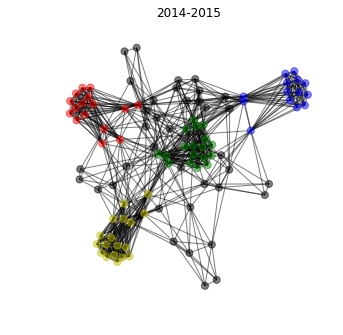

num players: 1542
num teams: 102
num matchups happened: 34746
num potential matchups: 157284
network completion%: 22.09


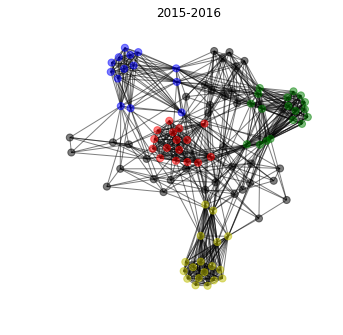

num players: 1378
num teams: 89
num matchups happened: 30541
num potential matchups: 122642
network completion%: 24.9


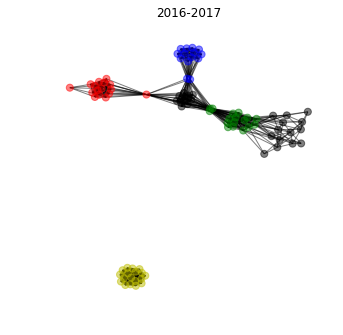

In [9]:
league_colors = {'greek-basket-league' : 'b',
                 'spain-liga-acb' : 'g',
                 'italy-basket-serie-a' : 'r',
                 'france-lnb-pro-a' : 'y',
                 'other' : 'k'
                }

for year in years:
    
    # table info
    table_info(dfs[year])
    
    G = nx.from_pandas_dataframe(dfs[year], 'team_id', 'opp_id')
    
    plt.figure(figsize=(4,4))
    
    node_colors = [league_colors[get_league_id(team_id, year)] for team_id in list(G.nodes())]

    nx.draw(G, alpha=0.5, node_size=50, with_labels=False, node_color=node_colors)

    plt.title('{}-{}'.format(year-1, year))
    plt.show()

### Prune step 1 - only teams w club play data

In [10]:
for year in years:
    dfs[year] = dfs[year][(dfs[year]['team_league_id'] != 'other') &  (dfs[year]['opp_league_id'] != 'other')]

In [11]:
dfs[2017].head()

,player_id,mp,fg,fga,fg3,fg3a,ft,fta,orb,trb,...,pts,player_name,team_id,opp_id,team_pts,opp_pts,boxscore_id,is_playoffs,team_league_id,opp_league_id
0,devyn-marble-1,29.0,5.0,16.0,1.0,9.0,6.0,6.0,0.0,5.0,...,17.0,Devyn Marble,aris,aries-trikala,75,65,2016-10-08-aris,False,greek-basket-league,greek-basket-league
1,spiros-mourtos-1,28.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,...,2.0,Spyros Mourtos,aris,aries-trikala,75,65,2016-10-08-aris,False,greek-basket-league,greek-basket-league
2,will-cummings-1,21.0,4.0,7.0,1.0,2.0,6.0,6.0,0.0,1.0,...,15.0,Will Cummings,aris,aries-trikala,75,65,2016-10-08-aris,False,greek-basket-league,greek-basket-league
3,eric-buckner-1,20.0,0.0,2.0,0.0,0.0,3.0,6.0,1.0,8.0,...,3.0,Eric Buckner,aris,aries-trikala,75,65,2016-10-08-aris,False,greek-basket-league,greek-basket-league
4,michalis-tsairelis-1,20.0,3.0,5.0,0.0,1.0,2.0,2.0,0.0,4.0,...,8.0,Michalis Tsairelis,aris,aries-trikala,75,65,2016-10-08-aris,False,greek-basket-league,greek-basket-league


num players: 1042
num teams: 66
num matchups happened: 24509
num potential matchups: 68772
network completion%: 35.64


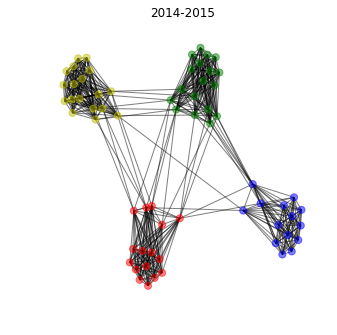

num players: 1050
num teams: 66
num matchups happened: 25061
num potential matchups: 69300
network completion%: 36.16


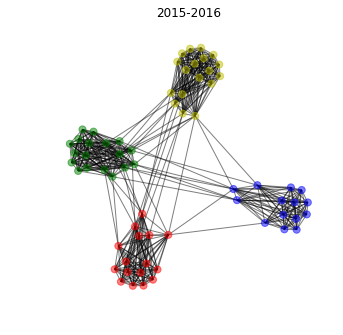

num players: 1032
num teams: 65
num matchups happened: 22972
num potential matchups: 67080
network completion%: 34.25


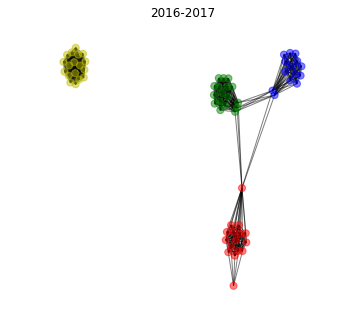

In [12]:
for year in years:
    
    # table info
    table_info(dfs[year])
    
    G = nx.from_pandas_dataframe(dfs[year], 'team_id', 'opp_id')
    
    plt.figure(figsize=(4,4))
    
    node_colors = [league_colors[get_league_id(team_id, year)] for team_id in list(G.nodes())]

    nx.draw(G, alpha=0.5, node_size=50, with_labels=False, node_color=node_colors)

    plt.title('{}-{}'.format(year-1, year))
    plt.show()

### Prune step 2 - take out French 2016-2017

In [13]:
dfs[2017] = dfs[year][(dfs[2017]['team_league_id'] != 'france-lnb-pro-a') &  (dfs[2017]['opp_league_id'] != 'france-lnb-pro-a')]

num players: 1042
num teams: 66
num matchups happened: 24509
num potential matchups: 68772
network completion%: 35.64


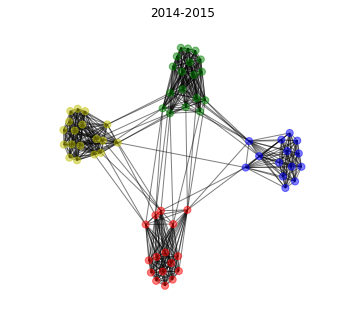

num players: 1050
num teams: 66
num matchups happened: 25061
num potential matchups: 69300
network completion%: 36.16


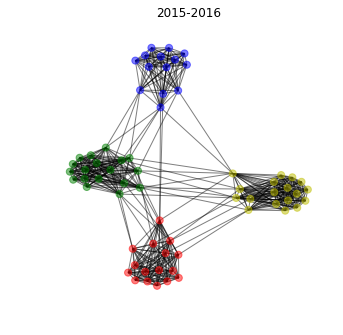

num players: 765
num teams: 47
num matchups happened: 16916
num potential matchups: 35955
network completion%: 47.05


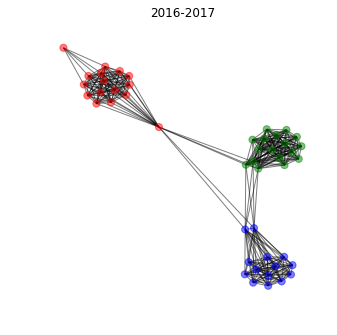

In [14]:
for year in years:
    
    # table info
    table_info(dfs[year])
    
    G = nx.from_pandas_dataframe(dfs[year], 'team_id', 'opp_id')
    
    plt.figure(figsize=(4,4))
    
    node_colors = [league_colors[get_league_id(team_id, year)] for team_id in list(G.nodes())]

    nx.draw(G, alpha=0.5, node_size=50, with_labels=False, node_color=node_colors)

    plt.title('{}-{}'.format(year-1, year))
    plt.show()

In [15]:
from strategies import num_triangles

for year in years:
    print(year)
    G = nx.from_pandas_dataframe(dfs[year], 'player_id', 'opp_id')
    dfs[year]['num_triangles'] = dfs[year].apply(lambda row: num_triangles(G, row['opp_id'], row['player_id']), axis=1)

2015
2016
2017


In [16]:
dfs[2015].head()

,player_id,mp,fg,fga,fg3,fg3a,ft,fta,orb,trb,...,player_name,team_id,opp_id,team_pts,opp_pts,boxscore_id,is_playoffs,team_league_id,opp_league_id,num_triangles
0,eric-atkins-1,34.0,0.0,5.0,0.0,1.0,4.0,4.0,0.0,1.0,...,Eric Atkins,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league,1792
1,diamantis-slaftsakis-1,27.0,1.0,4.0,0.0,1.0,1.0,4.0,2.0,13.0,...,Diamantis Slaftsakis,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league,1792
2,terone-johnson-1,26.0,4.0,9.0,2.0,4.0,2.0,2.0,1.0,2.0,...,Terone Johnson,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league,1483
3,rob-loe-1,26.0,4.0,10.0,1.0,3.0,1.0,3.0,2.0,3.0,...,Rob Loe,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league,1792
4,linos-chrysikopoulos-1,16.0,4.0,7.0,2.0,4.0,0.0,0.0,1.0,2.0,...,Linos Chrysikopoulos,drama,aries-trikala,62,57,2014-10-12-drama,False,greek-basket-league,greek-basket-league,1645


In [17]:
# prune
min_triangles = 10

for year in years:
    dfs[year] = dfs[year][dfs[year]['num_triangles'] >= min_triangles]

num players: 983
num teams: 66
num matchups happened: 24449
num potential matchups: 64878
network completion%: 37.68


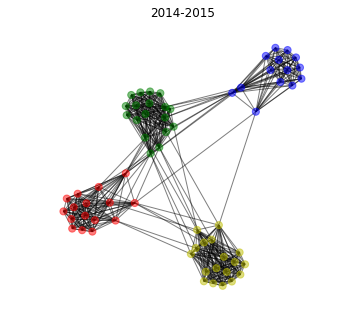

num players: 1012
num teams: 66
num matchups happened: 25022
num potential matchups: 66792
network completion%: 37.46


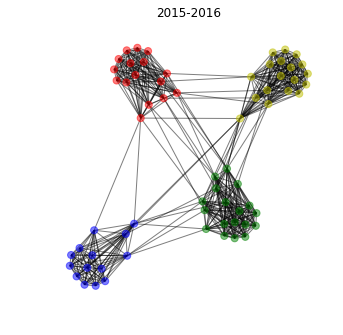

num players: 716
num teams: 47
num matchups happened: 16864
num potential matchups: 33652
network completion%: 50.11


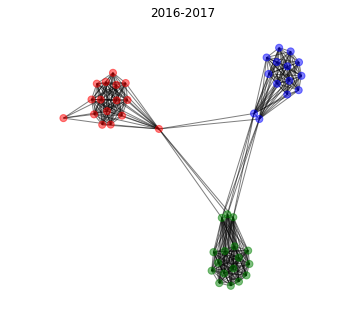

In [18]:
for year in years:
    
    # table info
    table_info(dfs[year])
    
    G = nx.from_pandas_dataframe(dfs[year], 'team_id', 'opp_id')
    
    plt.figure(figsize=(4,4))
    
    node_colors = [league_colors[get_league_id(team_id, year)] for team_id in list(G.nodes())]

    nx.draw(G, alpha=0.5, node_size=50, with_labels=False, node_color=node_colors)

    plt.title('{}-{}'.format(year-1, year))
    plt.show()

### Save final pruned data

In [20]:
for year in years:
    dfs[year].to_csv('pruned_data/pruned_data_{}.csv'.format(year), index=False)